In [12]:
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
import cmocean.cm as cm
import seaborn as sns
from scipy.stats import mannwhitneyu, ks_2samp
plt.style.use("ggplot")

In [13]:
ds_open = xr.open_dataset("../data/open/fields_biogem_2d.nc")
ds_close = xr.open_dataset("../data/close/fields_biogem_2d.nc")

In [14]:
zt_open = ds_open["zt_moc"].to_numpy()
lat_open = ds_open["lat_moc"].to_numpy()
psi_open = ds_open["phys_opsi"].isel(time=0)

zt_close = ds_close["zt_moc"].to_numpy()
lat_close = ds_close["lat_moc"].to_numpy()
psi_close = ds_close["phys_opsi"].isel(time=0)

psi_anom = (psi_close - psi_open).to_numpy()

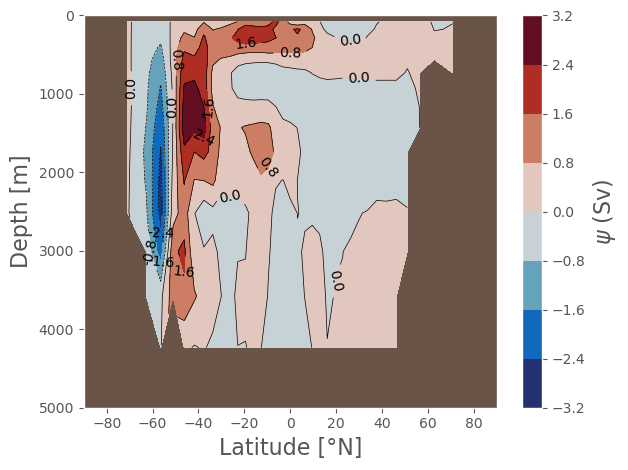

In [15]:
plt.fill_between(lat_close, zt_close.min(), zt_close.max(), color='#695447')
contour_filled = plt.contourf(lat_close, zt_close, psi_anom, 
                              #levels=colorbar_levels, 
                              cmap=cm.balance)
contour_lines = plt.contour(lat_close, zt_close, psi_anom, 
                            #levels=colorbar_levels,
                            colors='k', linewidths=0.5)

plt.xlabel("Latitude [°N]", fontsize=16)
plt.ylabel("Depth [m]", fontsize=16)
cbar = plt.colorbar(contour_filled)
cbar.set_label(r"$\psi$ (Sv)", fontsize=16)
plt.clabel(contour_lines, inline=True, fontsize=10, fmt='%1.1f')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.savefig("../figs/fig3c.png", dpi=600)

In [16]:
ds_open = xr.open_dataset("../data/open/fields_biogem_3d.nc")
ds_close = xr.open_dataset("../data/close/fields_biogem_3d.nc")

In [17]:
lon_open = ds_open["lon"].to_numpy()
lat_open = ds_open["lat"].to_numpy()
rho_open = ds_open["phys_ocn_rho"].isel(time=0, zt=0)

lon_close = ds_close["lon"].to_numpy()
lat_close = ds_close["lat"].to_numpy()
rho_close = ds_close["phys_ocn_rho"].isel(time=0, zt=0)

rho_anom = (rho_close - rho_open).to_numpy()

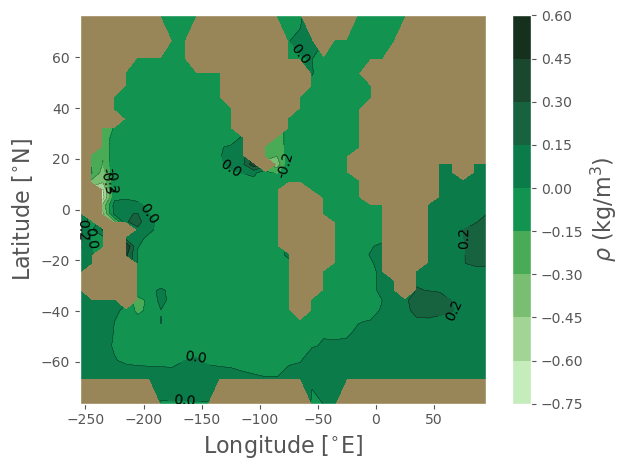

In [18]:
plt.fill_between(lon_close, lat_close.min(), lat_close.max(), color='#988558');
contour_filled = plt.contourf(lon_close, lat_close, rho_anom,
                              #levels=colorbar_levels, 
                              cmap=cm.algae);
contour_lines = plt.contour(lon_close, lat_close, rho_anom, 
                            #levels=colorbar_levels, 
                            colors='k', linewidths=0.2);
plt.xlabel(r"Longitude [$^{\circ}$E]", fontsize=16);
plt.ylabel(r"Latitude [$^{\circ}$N]", fontsize=16);
cbar = plt.colorbar(contour_filled);
cbar.set_label(r"$\rho$ (kg/m$^3$)", fontsize=16);
plt.clabel(contour_lines, inline=True, fontsize=10, fmt='%1.1f'); 
plt.tight_layout()
plt.savefig("../figs/fig1c.png", dpi=600)

In [19]:
zt_open = ds_open["zt"].to_numpy()
lat_open = ds_open["lat"].to_numpy()
rho_open = ds_open["phys_ocn_rho"].isel(time=0).mean(dim="lon")

zt_close = ds_close["zt"].to_numpy()
lat_close = ds_close["lat"].to_numpy()
rho_close = ds_close["phys_ocn_rho"].isel(time=0).mean(dim="lon")

rho_anom = (rho_close - rho_open).to_numpy()

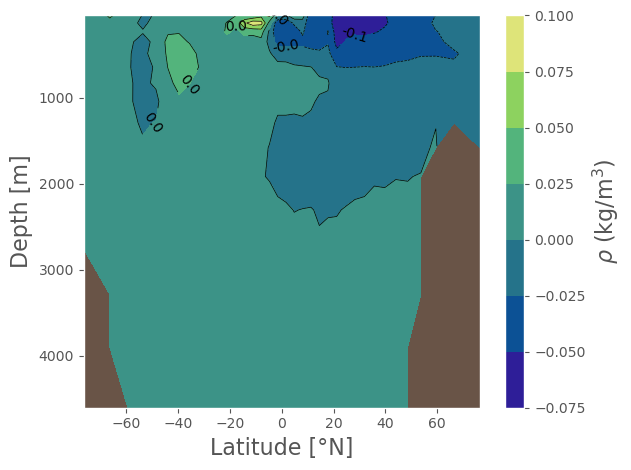

In [20]:
plt.fill_between(lat_close, zt_close.min(), zt_close.max(), color='#695447')
contour_filled = plt.contourf(lat_close, zt_close, rho_anom, 
                              #levels=colorbar_levels, 
                              cmap=cm.haline)
contour_lines = plt.contour(lat_close, zt_close, rho_anom, 
                            #levels=colorbar_levels,
                            colors='k', linewidths=0.5)

plt.xlabel("Latitude [°N]", fontsize=16)
plt.ylabel("Depth [m]", fontsize=16)
cbar = plt.colorbar(contour_filled)
cbar.set_label(r"$\rho$ (kg/m$^3$)", fontsize=16)
plt.clabel(contour_lines, inline=True, fontsize=10, fmt='%1.1f')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.savefig("../figs/fig2c.png", dpi=600)

In [21]:
zt_open = ds_open["zt"].to_numpy()
lat_open = ds_open["lat"].to_numpy()
dage_open = ds_open["misc_col_Dage"].isel(time=0).mean(dim="lon")

zt_close = ds_close["zt"].to_numpy()
lat_close = ds_close["lat"].to_numpy()
dage_close = ds_close["misc_col_Dage"].isel(time=0).mean(dim="lon")

dage_anom = (dage_close - dage_open).to_numpy()

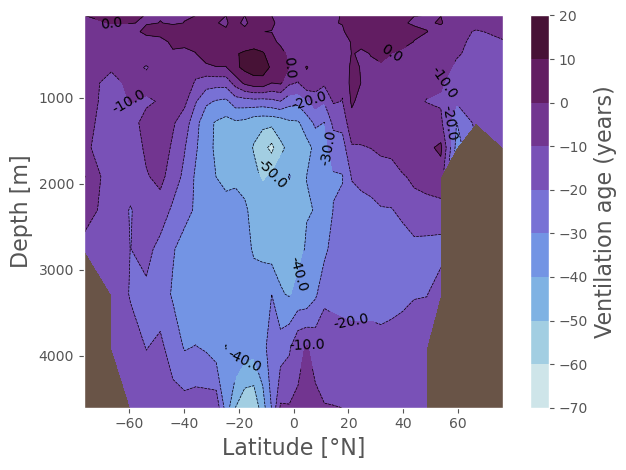

In [22]:
plt.fill_between(lat_close, zt_close.min(), zt_close.max(), color='#695447')
contour_filled = plt.contourf(lat_close, zt_open, dage_anom, 
                              #levels=colorbar_levels, 
                              cmap=cm.dense)
contour_lines = plt.contour(lat_close, zt_close, dage_anom, 
                            #levels=colorbar_levels,
                            colors='k', linewidths=0.5)

plt.xlabel("Latitude [°N]", fontsize=16)
plt.ylabel("Depth [m]", fontsize=16)
cbar = plt.colorbar(contour_filled)
cbar.set_label(r"Ventilation age (years)", fontsize=16)
plt.clabel(contour_lines, inline=True, fontsize=10, fmt='%1.1f')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.savefig("../figs/fig4c.png", dpi=600)

\begin{figure}[H]
    \label{fig1}
    \centering
    \subfigure(a){\includegraphics[width=0.46\textwidth]{figs/fig1a.png}}
    \hfill
    \subfigure(b){\includegraphics[width=0.36\textwidth]{figs/fig1b.png}}
    \hfill
    \subfigure(c){\includegraphics[width=0.36\textwidth]{figs/fig1c.png}}
    \subfigure(d){\includegraphics[width=0.36\textwidth]{figs/fig1d.png}}
    \hfill
    \subfigure(d){\includegraphics[width=0.36\textwidth]{figs/fig1e.png}}
    \hfill
     \subfigure(d){\includegraphics[width=0.36\textwidth]{figs/fig1f.png}}
    \caption{(a) blah (b) blah (c) blah (d) blah}
\end{figure}


\begin{figure}[H]
    \label{fig2}
    \centering
    \subfigure(a){\includegraphics[width=0.46\textwidth]{figs/fig2a.png}}
    \hfill
    \subfigure(b){\includegraphics[width=0.46\textwidth]{figs/fig2b.png}}
    \hfill
    \subfigure(c){\includegraphics[width=0.46\textwidth]{figs/fig2c.png}}
    \subfigure(d){\includegraphics[width=0.46\textwidth]{figs/fig2d.png}}
    \hfill
    \caption{(a) blah (b) blah (c) blah (d) blah}
    \hfill
\end{figure}

\begin{figure}[H]
    \label{fig3}
    \centering
    \subfigure(a){\includegraphics[width=0.46\textwidth]{figs/fig3a.png}}
    \hfill
    \subfigure(b){\includegraphics[width=0.46\textwidth]{figs/fig3b.png}}
    \hfill
    \subfigure(c){\includegraphics[width=0.46\textwidth]{figs/fig3c.png}}
    \subfigure(d){\includegraphics[width=0.46\textwidth]{figs/fig3d.png}}
    \hfill
    \caption{(a) blah (b) blah (c) blah (d) blah}
    \hfill
\end{figure}


\begin{figure}[H]
    \label{fig4}
    \centering
    \subfigure(a){\includegraphics[width=0.46\textwidth]{figs/fig4a.png}}
    \hfill
    \subfigure(b){\includegraphics[width=0.46\textwidth]{figs/fig4b.png}}
    \hfill
    \subfigure(c){\includegraphics[width=0.46\textwidth]{figs/fig4c.png}}
    \subfigure(d){\includegraphics[width=0.46\textwidth]{figs/fig4d.png}}
    \hfill
    \caption{(a)  (b) blah (c) blah (d) blah}
    \hfill
\end{figure}